# inferrence

## boring part - collapse this section.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.utils as vutils
import base64
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision import transforms
from io import BytesIO
from PIL import Image, ImageOps
from tqdm import tqdm
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms.functional as TF
import torch
import torch.nn as nn
import io

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
HR = 256
LR = 64

# https://www.kaggle.com/datasets/chetankv/dogs-cats-images
# https://www.kaggle.com/datasets/nerfviking/fantasyscifi-full-body-character-concepts
# https://www.kaggle.com/datasets/hlrhegemony/pokemon-image-dataset
experiments = {
    "fantasy": ("./data/fantasy", "checkpoints/UNet128_2025-09-12_08-24-21_fantasy.pth", "checkpoints/UNetSR3_2025-09-14_17-32-01_fantasy.pth"),
    "cats_and_dogs": ("./data/cats_and_dogs/dataset/training_set", "checkpoints/UNet128_2025-09-08_17-57-30_cats_and_dogs.pth",None),
    "pokemon": ("./data/pokemon_archive","UNet128_2025-09-12_11-03-12_pokemon.pth",None),
    "dragon": ("utils/dataset_fetcher/datasets/", "checkpoints/UNet128_2025-09-14_01-53-22_dragon.pth",None),
    "yugioh": ("data/yugioh/YuGiOhImages",None,None),
    "mnist": (None,None,None),
}

experiment_name = "fantasy"


In [3]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from elucidated_diffusion.image_helpers import sr_to_pil
from elucidated_diffusion.image_helpers import pil_to_data_url
from elucidated_diffusion.image_helpers import html_for_images
from elucidated_diffusion.image_helpers import imgs_to_sr_tensors
from elucidated_diffusion.models.chatgpt_diffusion_unet import UNet128
from elucidated_diffusion.models.chatgpt_sr_unet import UNetSR3
from elucidated_diffusion.checkpoint_helper import load_checkpoint
from elucidated_diffusion.elucidated_diffusion import edm_ancestral_sampling_for_diffusion
from elucidated_diffusion.elucidated_diffusion import edm_ancestral_sampling_for_sr

In [4]:
def generate_images(model_edm, num_steps=15, batch_size=20, img_shape = (3,64,64)):
    with torch.no_grad():
        samples = edm_ancestral_sampling_for_diffusion(model_edm, num_steps=num_steps, batch_size=batch_size, img_shape=(3, 64, 64)).cpu()
        pil_images = [sr_to_pil(img) for img in samples]
    return pil_images

def sample_html(model, batch_size=12, img_shape=(3,64,64), num_steps=36, title="EDM Samples",min_height=128):
    imgs = generate_images(model_edm=model, batch_size=batch_size, img_shape=img_shape, num_steps=16)
    h = html_for_images(imgs, title=title, min_height=min_height)
    return h

In [5]:

def generate_html_examples(cp="checkpoints/UNet128_2025-09-12_19-47-15_dragon.pth",batch_size=12):
    with torch.no_grad():
        model_edm = UNet128(use_attention=True).to(device)
        optimizer_edm = None
        load_checkpoint(model_edm, optimizer_edm, cp)
        imgs = generate_images(model_edm=model_edm, batch_size=batch_size, img_shape=(3,64,64), num_steps=16)
        return imgs


## Generate some images.

🔄 Loaded checkpoint from checkpoints/UNet128_2025-09-14_17-47-44_fantasy.pth
    Epoch: 1, Loss: 0.07292061299085617
    Model class: UNet128



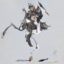
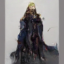
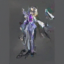
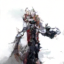
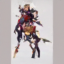
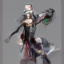
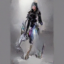
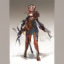
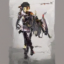
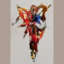
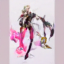
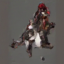

In [6]:
artistic_path = "checkpoints/UNet128_2025-09-14_17-47-44_fantasy.pth"
imgs = generate_html_examples(cp=artistic_path)
h = html_for_images(imgs,title="Generated from fantasy checkpoint")
ipd.HTML(h)

In [7]:
lr = imgs_to_sr_tensors(imgs)
#good_path = 'checkpoints/UNetSR3_2025-09-15_08-14-19__SR_fantasy_really_good.pth'
#good_path = 'checkpoints/UNetSR3_2025-09-18_08-10-31__SR_fantasy_ema_sr.pth'

#good_path = 'checkpoints/UNetSR3_2025-09-15_19-38-09__SR_dragon_really_good.pth'
#sr_model = UNetSR3().cuda()
#load_checkpoint(sr_model, None, good_path)

from elucidated_diffusion.models.claude_sr_ViT import HybridViTUNetSR
sr_model2 = HybridViTUNetSR().to(device)
good_checkpoint = 'checkpoints/HybridViTUNetSR_2025-09-20_00-06-51__SR_ViT_fantasy_raw_sr.pth'
load_checkpoint(sr_model2,None,good_checkpoint)


with torch.inference_mode():
    print(lr.shape)
    #out1 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=18,batch_size=12,img_shape=(3,256,256))
    #out2 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=18,batch_size=12,img_shape=(3,256,256), headstart_sigma=3)
    #out3 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=3, batch_size=12,img_shape=(3,256,256), headstart_sigma=1)
    out1 = edm_ancestral_sampling_for_sr(sr_model2, lr[0:2].cuda(), num_steps=18,batch_size=2,img_shape=(3,256,256))
    out2 = edm_ancestral_sampling_for_sr(sr_model2, lr[0:2].cuda(), num_steps=12,batch_size=2,img_shape=(3,256,256), headstart_sigma=3)
    out3 = edm_ancestral_sampling_for_sr(sr_model2, lr[0:2].cuda(), num_steps=3, batch_size=2,img_shape=(3,256,256), headstart_sigma=1)


🔄 Loaded checkpoint from checkpoints/HybridViTUNetSR_2025-09-20_00-06-51__SR_ViT_fantasy_raw_sr.pth
    Epoch: 3, Loss: 0.05
    Model class: HybridViTUNetSR
torch.Size([12, 3, 64, 64])


Legend:
      1. low res 64x64 on left - generated from the diffusion model
      2. upscaled (blurry) low-res
      3. Full super-resolution diffusion
      4. Headstart diffusion adding 3-sigma noise to the upscaled LR [half way between traditional and Toyota]
      5. One-shot SR - 
      



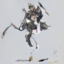
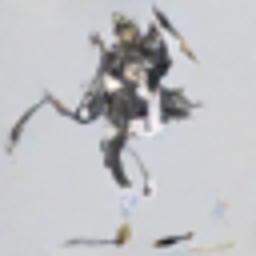
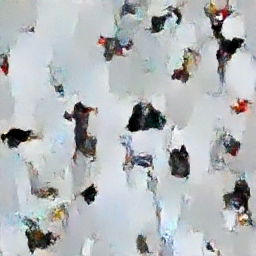
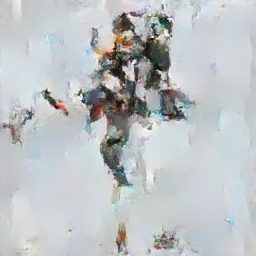
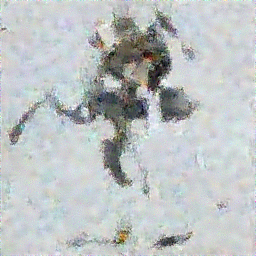


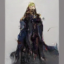
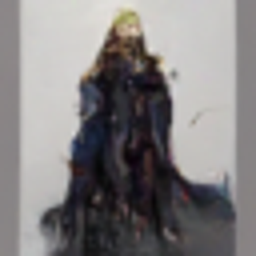
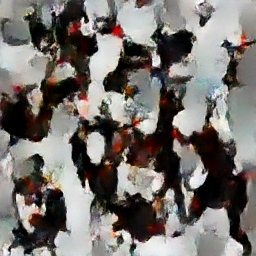
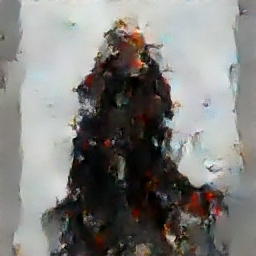
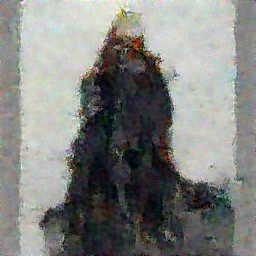

IndexError: index 2 is out of bounds for dimension 0 with size 2

In [10]:
print("""Legend:
      1. low res 64x64 on left - generated from the diffusion model
      2. upscaled (blurry) low-res
      3. Full super-resolution diffusion
      4. Headstart diffusion adding 3-sigma noise to the upscaled LR [half way between traditional and Toyota]
      5. One-shot SR - 
      """)
for idx in range(lr.shape[0]):
    lri,sri,sri2,sri3 = [sr_to_pil(i) for i in [lr[idx],out1[idx],out2[idx],out3[idx]]]
    title = f"Imgs for {idx}"
    h = html_for_images([lri,lri.resize((256,256)),sri,sri2,sri3], title=title)
    ipd.display(ipd.HTML(h))

🔄 Loaded checkpoint from checkpoints/UNet128_2025-09-17_01-57-52_dragon_ema.pth
    Epoch: 152, Loss: 0.12499527633190155
    Model class: UNet128



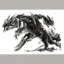
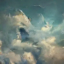
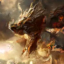
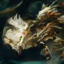
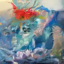
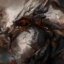
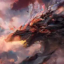
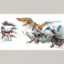
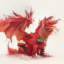
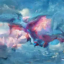
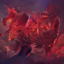
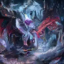

In [ ]:
good_dragon = "checkpoints/UNet128_2025-09-12_19-47-15_dragon.pth"
good_dragon = 'checkpoints/UNet128_2025-09-17_01-57-51_dragon.pth'
good_dragon = 'checkpoints/UNet128_2025-09-17_01-57-52_dragon_ema.pth'
imgs = generate_html_examples(cp=good_dragon)

h = html_for_images(imgs,title="Generated from dragon checkpoint", min_height=128)
ipd.HTML(h)

In [ ]:
lr = imgs_to_sr_tensors(imgs)
#good_path = 'checkpoints/UNetSR3_2025-09-15_08-14-19__SR_fantasy_really_good.pth'
good_path = 'checkpoints/UNetSR3_2025-09-15_19-38-09__SR_dragon_really_good.pth'

good_path = 'checkpoints/UNetSR3_2025-09-18_08-10-31__SR_fantasy_ema_sr.pth'
sr_model = UNetSR3().cuda()
load_checkpoint(sr_model, None, good_path)

with torch.inference_mode():
    print(lr.shape)
    t0 = time.time()
    out1 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=18,batch_size=12,img_shape=(3,256,256))
    t1 = time.time()
    out2 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=12,batch_size=12,img_shape=(3,256,256), headstart_sigma=3)
    t2 = time.time()
    out3 = edm_ancestral_sampling_for_sr(sr_model, lr.cuda(), num_steps=6, batch_size=12,img_shape=(3,256,256), headstart_sigma=1)
    t3 = time.time()
    print(t1-t0,t2-t1,t3-t2)


🔄 Loaded checkpoint from checkpoints/UNetSR3_2025-09-18_08-10-31__SR_fantasy_ema_sr.pth
    Epoch: 85, Loss: 0.11
    Model class: UNetSR3
torch.Size([12, 3, 64, 64])
5.184571743011475 3.3810203075408936 1.6515467166900635


Legend:
      1. low res 64x64 on left - generated from the diffusion model
      2. upscaled (blurry) low-res
      3. Full super-resolution diffusion
      4. Headstart diffusion adding 3-sigma noise to the upscaled LR [half way between traditional and Toyota]
      5. One-shot SR - 
      



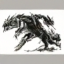
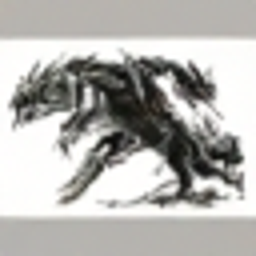
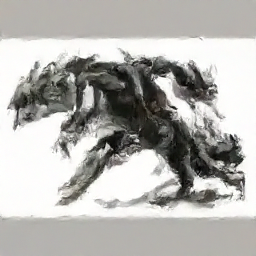
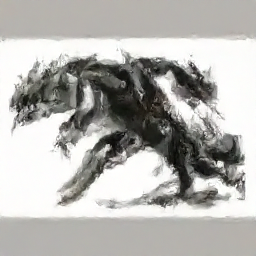
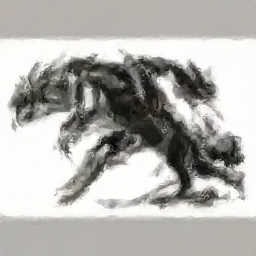


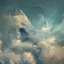
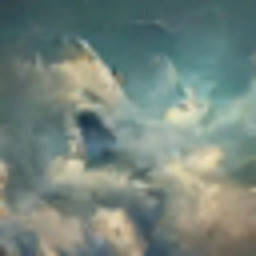
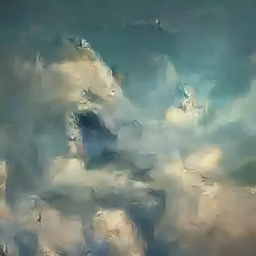
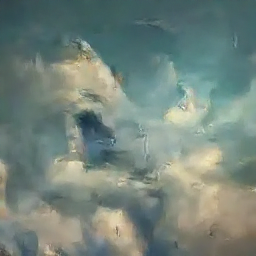
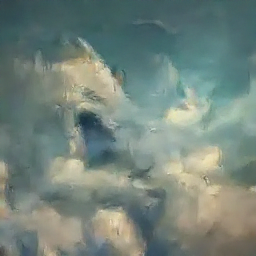


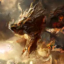
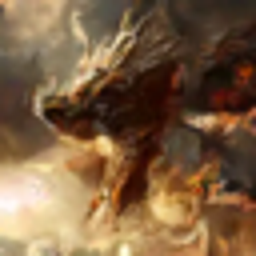
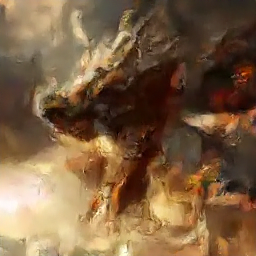
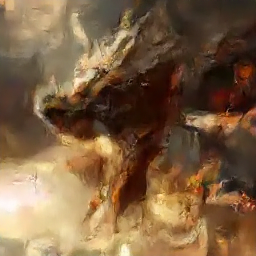
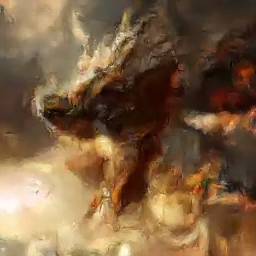


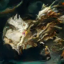
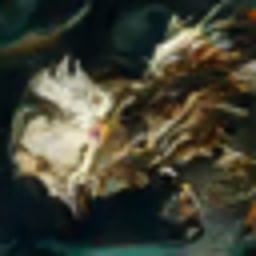
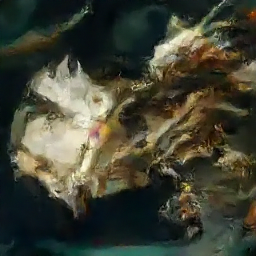
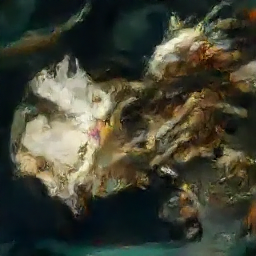
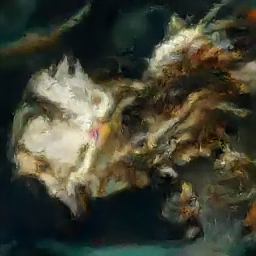


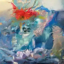
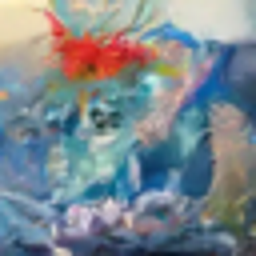
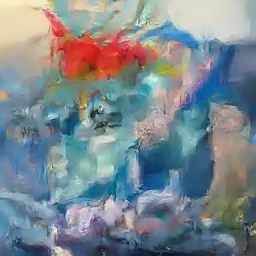
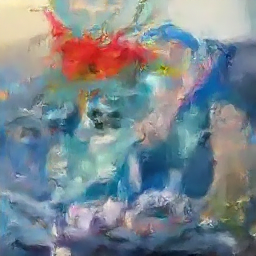
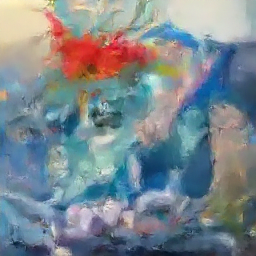


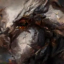
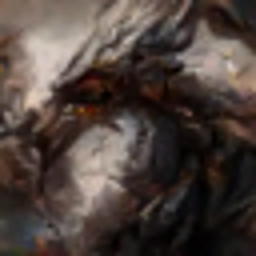
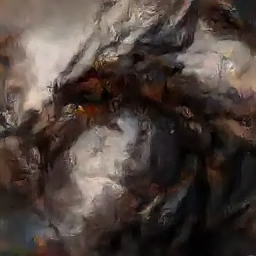
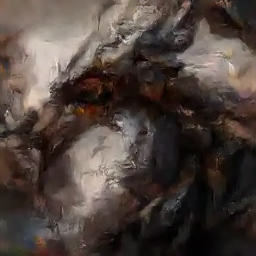
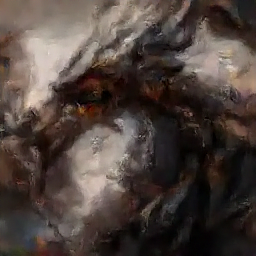


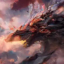
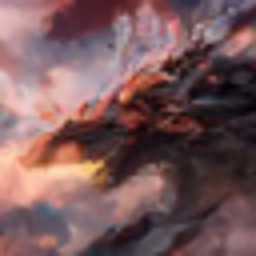
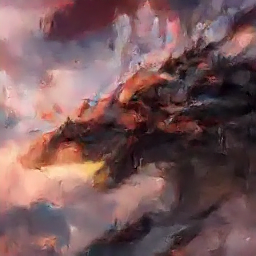
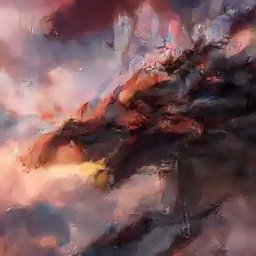
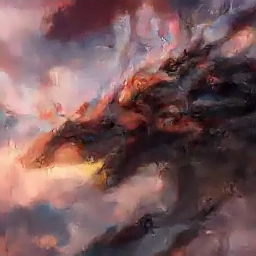


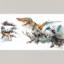
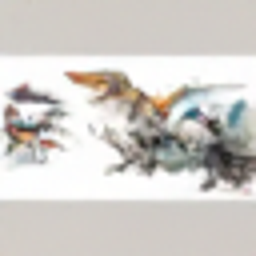
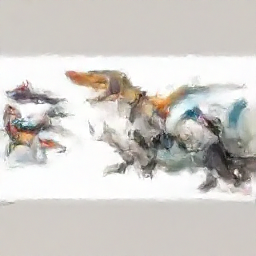
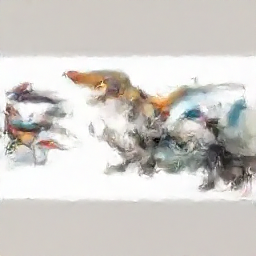
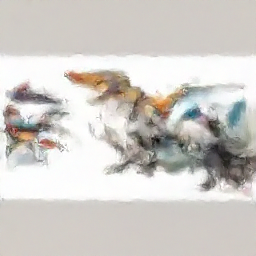


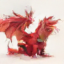
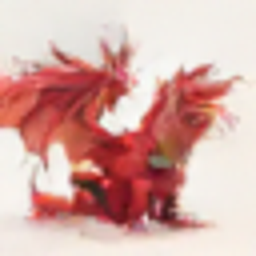
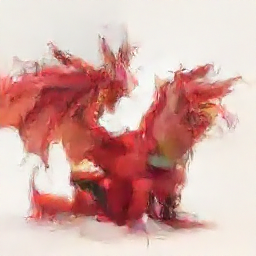
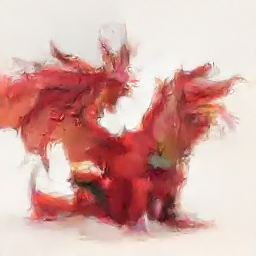
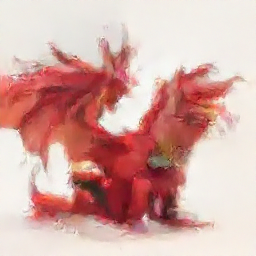


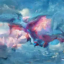
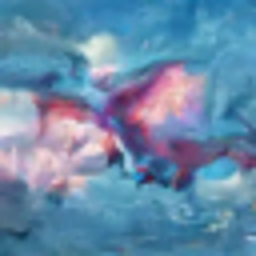
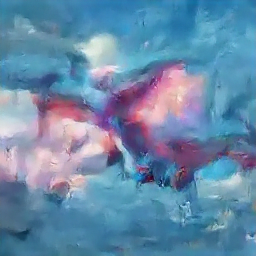
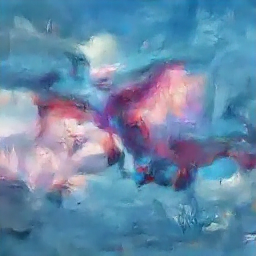
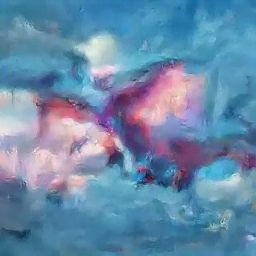


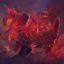
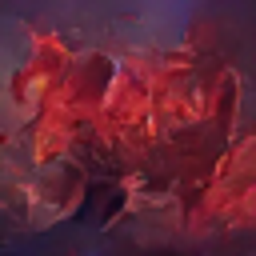
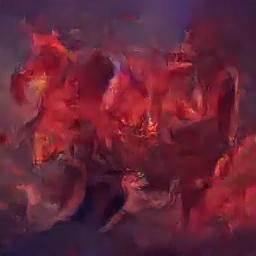
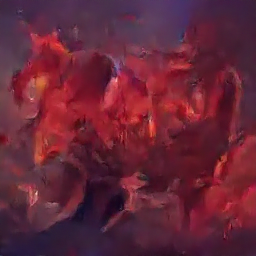
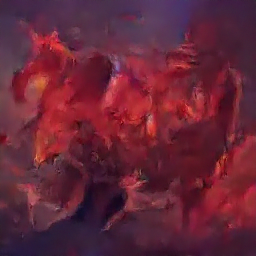


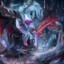
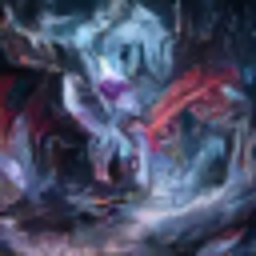
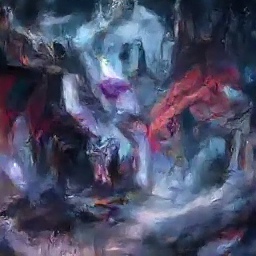
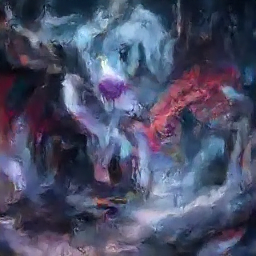
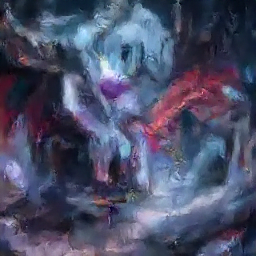

In [ ]:
print("""Legend:
      1. low res 64x64 on left - generated from the diffusion model
      2. upscaled (blurry) low-res
      3. Full super-resolution diffusion
      4. Headstart diffusion adding 3-sigma noise to the upscaled LR [half way between traditional and Toyota]
      5. One-shot SR - 
      """)
for idx in range(lr.shape[0]):
    lri,sri,sri2,sri3 = [sr_to_pil(i) for i in [lr[idx],out1[idx],out2[idx],out3[idx]]]
    title = f"Imgs for {idx}"
    h = html_for_images([lri,lri.resize((256,256)),sri,sri2,sri3], title=title)
    ipd.display(ipd.HTML(h))

🔄 Loaded checkpoint from checkpoints/UNet128_2025-09-08_17-57-30_cats_and_dogs.pth
    Epoch: 3306, Loss: 0.13632425665855408
    Model class: UNet128



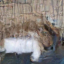
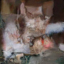
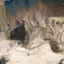
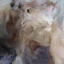
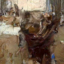
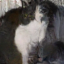
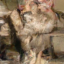
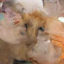
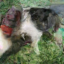
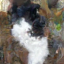
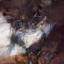
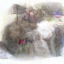

In [ ]:
imgs = generate_html_examples(cp="checkpoints/UNet128_2025-09-08_17-57-30_cats_and_dogs.pth")
h = html_for_images(imgs,title="Generated from cats_and_dogs checkpoint")
ipd.HTML(h)